In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
%matplotlib inline

In C:\Users\King\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\King\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\King\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\King\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\King\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle

In [2]:
data_df = pd.read_csv("Cust_Spend_Data_New.csv")

In [3]:
data_df.head(10)

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,Abraham,1123,28,1,16,14
1,2,Adela,9818,13,5,2,5
2,3,Adelina,9824,10,10,2,2
3,4,Adrian,3097,23,2,8,9
4,5,Adrianna,817,28,1,17,17
5,6,Aide,3039,21,1,8,12
6,7,Alex,4676,22,3,8,13
7,8,Alexandria,7869,14,6,3,3
8,9,Alline,5585,21,2,10,12
9,10,Allyn,4589,23,2,8,9


In [0]:
data_df.shape

(829, 7)

In [4]:
data_df.dtypes

Cust_ID             int64
Name               object
Avg_Mthly_Spend     int64
No_Of_Visits        int64
Apparel_Items       int64
FnV_Items           int64
Staples_Items       int64
dtype: object

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Cust_ID          829 non-null    int64 
 1   Name             829 non-null    object
 2   Avg_Mthly_Spend  829 non-null    int64 
 3   No_Of_Visits     829 non-null    int64 
 4   Apparel_Items    829 non-null    int64 
 5   FnV_Items        829 non-null    int64 
 6   Staples_Items    829 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 45.5+ KB


In [6]:
data_df.describe()

,Cust_ID,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
count,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000
mean,415.000000,4801.276236,17.856454,3.961399,7.623643,8.338963
std,239.455981,2056.494189,4.367192,2.056204,3.665773,4.250284
min,1.000000,549.000000,2.000000,0.000000,1.000000,0.000000
25%,208.000000,4156.000000,15.000000,3.000000,6.000000,5.000000
50%,415.000000,4516.000000,18.000000,4.000000,7.000000,8.000000
75%,622.000000,4910.000000,20.000000,5.000000,8.000000,10.000000
max,829.000000,10000.000000,29.000000,10.000000,19.000000,20.000000


In [7]:
data_df.duplicated().sum()

0

In [8]:
cust_df = data_df.drop(['Name','Cust_ID'], axis=1)

In [9]:
cust_df.head()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1123,28,1,16,14
1,9818,13,5,2,5
2,9824,10,10,2,2
3,3097,23,2,8,9
4,817,28,1,17,17


In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
X = StandardScaler()

In [12]:
scaled_df = X.fit_transform(cust_df)

In [13]:
scaled_df

array([[-1.7896947 ,  2.32407237, -1.44109551,  2.28639713,  1.33272373],
       [ 2.44092704, -1.1127025 ,  0.50541069, -1.53502065, -0.78605994],
       [ 2.44384639, -1.80005748,  2.93854344, -1.53502065, -1.49232116],
       ...,
       [-0.14707492, -0.65446585,  0.01878414,  0.10272982,  0.15562169],
       [-0.35629486,  0.49112577,  0.01878414, -0.17022859,  0.3910421 ],
       [-0.03468002,  0.03288912,  0.50541069,  0.10272982,  0.15562169]])

In [14]:
k_means = KMeans(n_clusters = 2)

In [15]:
k_means.fit(scaled_df)

KMeans(n_clusters=2)

In [16]:
k_means.labels_

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [17]:
k_means.inertia_

2225.8180780994685

In [18]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
k_means.inertia_

1074.382380298951

In [19]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_df)
k_means.inertia_

909.4495242917942

In [20]:
k_means = KMeans(n_clusters = 1)
k_means.fit(scaled_df)
k_means.inertia_

4145.0

In [21]:
k_means = KMeans(n_clusters = 5)
k_means.fit(scaled_df)
k_means.inertia_

784.5624359391802

In [22]:
k_means = KMeans(n_clusters = 6)
k_means.fit(scaled_df)
k_means.inertia_

697.8265440467183

In [23]:
wss =[] 

In [24]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [25]:
wss

[4145.0,
 2225.8180780994685,
 1074.382380298951,
 909.4495242917942,
 784.5887748781101,
 715.3369752023683,
 628.7820506603549,
 581.1382375611548,
 539.7567283865701,
 511.91328561354123]

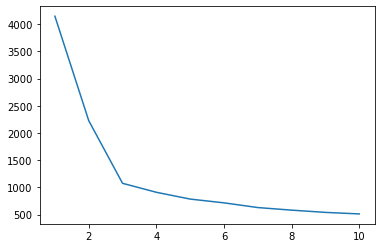

In [26]:
plt.plot(range(1,11), wss)

In [27]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
labels = k_means.labels_

In [28]:
data_df["Clus_kmeans"] = labels
data_df.head(5)

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,Clus_kmeans
0,1,Abraham,1123,28,1,16,14,2
1,2,Adela,9818,13,5,2,5,1
2,3,Adelina,9824,10,10,2,2,1
3,4,Adrian,3097,23,2,8,9,0
4,5,Adrianna,817,28,1,17,17,2


In [3]:
import numpy as np
x = np.random.seed(7)
x

In [4]:
array=np.array(np.random.rand(20)).reshape(10,2)
array

array([[0.07630829, 0.77991879],
       [0.43840923, 0.72346518],
       [0.97798951, 0.53849587],
       [0.50112046, 0.07205113],
       [0.26843898, 0.4998825 ],
       [0.67923   , 0.80373904],
       [0.38094113, 0.06593635],
       [0.2881456 , 0.90959353],
       [0.21338535, 0.45212396],
       [0.93120602, 0.02489923]])

In [5]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler()
df_test = X.fit_transform(array)
df_test

array([[-1.39522475,  0.93201877],
       [-0.1296922 ,  0.7523863 ],
       [ 1.75612561,  0.16382359],
       [ 0.08948178, -1.32037931],
       [-0.72373342,  0.04095785],
       [ 0.71196956,  1.00781355],
       [-0.33054158, -1.33983624],
       [-0.65485934,  1.34463703],
       [-0.91614429, -0.11100733],
       [ 1.59261863, -1.47041422]])

In [13]:
labels_test = np.array(np.random.rand(20)).reshape(10,2)
labels_test

array([[0.52341258, 0.75040986],
       [0.66901324, 0.46775286],
       [0.20484909, 0.49076589],
       [0.37238469, 0.47740115],
       [0.36589039, 0.83791799],
       [0.76864751, 0.31399468],
       [0.57262533, 0.27604905],
       [0.45284293, 0.35297837],
       [0.65739946, 0.37035108],
       [0.45909298, 0.71932412]])

In [14]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [11]:
silhouette_score(df_test,labels_test)

ValueError: Found input variables with inconsistent numbers of samples: [10, 2]

In [31]:
sil_width = silhouette_samples(scaled_df,labels)

In [32]:
data_df["sil_width"] = sil_width
data_df.head(5)

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,Clus_kmeans,sil_width
0,1,Abraham,1123,28,1,16,14,2,0.656055
1,2,Adela,9818,13,5,2,5,1,0.512424
2,3,Adelina,9824,10,10,2,2,1,0.582380
3,4,Adrian,3097,23,2,8,9,0,0.375197
4,5,Adrianna,817,28,1,17,17,2,0.703167


In [33]:
silhouette_samples(scaled_df,labels).min()

0.04131038567750352

In [34]:
data_df.to_csv('km.csv')